In [10]:
############ set-width of the notebook ###############################
from IPython.display import display, HTML
display(HTML("<style>.container { width:1200% !important; }</style>"))
from IPython.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [6]:
############ import libraries ###############################
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# from matplotlib.animation import FuncAnimation

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
print("vector diffusion equation solver")

%matplotlib inline

vector diffusion equation solver


In [7]:
# ===================== Axis Details =====================

# X-axis
xlen = 210
nx0 = 1  # required to devide delx into parts to tune to  more precision (default value = 1)
delx = 1/nx0
nx = int(xlen/delx)
x = np.linspace(0, xlen, nx)
xperiod = 100  # solution repeats after 100*a0                      
xblocks = int(xlen/xperiod)                               

# Y-axis
ylen = 25
ny0 = 1
dely = 1/ny0        # required to devide dely into parts for more precision (default value = 1)
ny = int(ylen/dely)
y = np.linspace(0, ylen, ny)
yperiod = 14 # solution repeats after  14*a0. this is equivalent to h defined later
yblocks = int(ylen/yperiod)

# Mesgrid
X, Y = np.meshgrid(x,y)

# ===================== Time Details =====================

"""
calculation of time steps. Maximum value of the time steps is given by 
"delt_max" (for anu values greater than this the solution doees not converge)
"""

alpha = 1
nt = 300
delt_max = (delx**2)/(4*alpha)
delt = delt_max
gamma = (alpha*delt) / (delx**2)

# ===================== Coefficients =====================  

am =  (0.1)*1
bm = abs(am)
cm = 0.3
lambda1 = -30
lambda2Vec = np.linspace(-lambda1*5, lambda1*8, 40)

h = 14
pi = np.pi
sigma = .25
b0 = .1
coeff1 = (b0/(4*(1 - sigma)*(h)))*1


# ===================== Output =====================
print("\n############### Outputs ###############")
print(f"lambda2 values: {coeff1 * lambda2Vec}")
print(f"x-blocks: {xblocks}, y-blocks: {yblocks}")
print(f"nx: {nx}, ny: {ny}")
print(f"x periodicity: {xperiod} * a0 (a0 = {nx0})")
print(f"y periodicity: {yperiod} * a0 (a0 = {ny0})")
print(f"h = {h} * a0 = {h}")
print(f"Max delt = {delt_max:.5f}, Used delt = {delt:.5f}")

print("\n########## Coefficients ##########")
print(f"am = {am}, bm = {bm}, cm = {cm}, sigma = {sigma}, coeff1 = {coeff1:.4f}")
print(f"bm = {abs(bm) / am:.4f} * am")
print(f"cm = {abs(cm) / am:.4f} * am")
print("#########################################")


############### Outputs ###############
lambda2 values: [ 0.35714286  0.33333333  0.30952381  0.28571429  0.26190476  0.23809524
  0.21428571  0.19047619  0.16666667  0.14285714  0.11904762  0.0952381
  0.07142857  0.04761905  0.02380952  0.         -0.02380952 -0.04761905
 -0.07142857 -0.0952381  -0.11904762 -0.14285714 -0.16666667 -0.19047619
 -0.21428571 -0.23809524 -0.26190476 -0.28571429 -0.30952381 -0.33333333
 -0.35714286 -0.38095238 -0.4047619  -0.42857143 -0.45238095 -0.47619048
 -0.5        -0.52380952 -0.54761905 -0.57142857]
x-blocks: 2, y-blocks: 1
nx: 210, ny: 25
x periodicity: 100 * a0 (a0 = 1)
y periodicity: 14 * a0 (a0 = 1)
h = 14 * a0 = 14
Max delt = 0.25000, Used delt = 0.25000

########## Coefficients ##########
am = 0.1, bm = 0.1, cm = 0.3, sigma = 0.25, coeff1 = 0.0024
bm = 1.0000 * am
cm = 3.0000 * am
#########################################


Note: We at first define empty matrix (3D) and then fill the matrix with a constant value. mx is given by u1, my is given by u2, mz is given by u3. And next we put the BC

## The vector PDE solver (to run following: select all -> crtl / and then run), to plot the previous results run from files described later

In [28]:

import time

# ====================== PARAMETERS & INITIALIZATION ======================

start_time = time.time()
delt1 = 0
delt2 = 0
count_lambda = 0

# Initialize solution arrays u1, u2, u3
u1 = np.empty((nx, ny))
u2 = np.empty((nx, ny))
u3 = np.empty((nx, ny))
u1.fill(.5,)
u2.fill(.5)
u3.fill(.5)

u1meanVec = []
u2meanVec = []

# ====================== MAIN TIME EVOLUTION LOOP =========================

for lambda2 in lambda2Vec: 
    for k in range(0, nt-1, 1):        
        tk = time.time()
        for i in range(0, nx, 1):
            for j in range(0, ny, 1): 
                u10 = u1[i, j]
                u20 = u2[i, j]
                u30 = u3[i, j]  
                
                # ---------- Second Derivatives with Periodic Boundary Conditions ----------
                 # x-direction second derivatives
                if i==0:
                    # we only calculate the following dxx's
                    u1xx = (1/delx**2)*(u1[nx-1, j] + u1[i+1, j] - 2*u1[i, j] )
                    u2xx = (1/delx**2)*(u2[nx-1, j] + u2[i+1, j] - 2*u2[i, j] )            

                elif i==nx-1:
                    # we only calculate the following dxx's
                    u1xx = (1/delx**2)*(u1[0, j] + u1[i-1, j] - 2*u1[i, j] )
                    u2xx = (1/delx**2)*(u2[0, j] + u2[i-1, j] - 2*u2[i, j] )                

                else:                
                    # we only calculate the following dxx's
                    u1xx = (1/delx**2)*(u1[i+1, j] + u1[i-1, j] - 2*u1[i, j] )
                    u2xx = (1/delx**2)*(u2[i+1, j] + u2[i-1, j] - 2*u2[i, j] )
                    
                 # y-direction second derivatives                                            
                if j==0:
                    # we only calculate the following dxx's
                    u1yy = (1/delx**2)*(u1[i, ny-1] + u1[i, 1] - 2*u1[i, j])
                    u2yy = (1/delx**2)*(u2[i, ny-1] + u2[i, 1] - 2*u2[i, j])
                elif j==ny-1:
                    # we donly calculate the following dxx's
                    u1yy = (1/delx**2)*(u1[i, 0] + u1[i, j-1] - 2*u1[i, j])
                    u2yy = (1/delx**2)*(u2[i, 0] + u2[i, j-1] - 2*u2[i, j])
                else:                
                    # we donly calculate the following dxx's
                    u1yy = (1/delx**2)*(u1[i, j+1] + u1[i, j-1] - 2*u1[i, j] )
                    u2yy = (1/delx**2)*(u2[i, j+1] + u2[i, j-1] - 2*u2[i, j] )
                    
                #---------------- strain-details----------------------------------       
                yji = Y[j,i]
                xji = X[j,i]
                xji = xji - nx/2
                # argy = pi*yji/h
                sin2y = np.sin(2*pi*yji/(h))
                sin1y = np.sin(pi*yji/(h))            
                epsilonxx = coeff1*(2*sin2y*np.exp(-2*pi*abs(xji/h))*(1 - 2*sigma + 4*pi*abs(xji/h))
                             + sin1y*np.exp(-pi*abs(xji)/h)*(4*pi*sigma*xji/h))
                epsilonyy = coeff1*(2*sin2y*np.exp(-2*pi*abs(xji/h))*(1 + 2*sigma - 4*pi*abs(xji/h))
                             + sin1y*np.exp(-pi*abs(xji)/h)*(4*pi*xji/h))
                #---------------- time-evolution ----------------------------------
                u1tkij = (am*u10 + bm*u10**3 - cm*(u1xx + u1yy) 
                                  + lambda1*(epsilonxx + epsilonyy)*u10 + lambda2*(epsilonxx - (1/2)*epsilonyy)*u10)                                         
                u1[i, j] = (u10 - delt*u1tkij)   
                u2tkij = (am*u20 + bm*u20**3 - cm*(u2xx + u2yy) 
                                  + lambda1*(epsilonxx + epsilonyy)*u20 + lambda2*(epsilonyy - (1/2)*epsilonxx)*u20)
                u2[i, j] = (u20 - delt*u2tkij)
                
            #------------ "forced"-periodicity (outside j-loop)------------------------      
            for n in range(yblocks+1):
                    u1[i, 14*n*ny0] = u1[i, 0]
                    u2[i, 14*n*ny0] = u2[i, 0]
                    
            #------------- "forced"-periodicity (outside i-loop)----------------------- 
            for n in range(xblocks+1):
                    u1[100*n*nx0, j] = u1[0, j]  
                    u2[100*n*nx0, j] = u2[0, j] 
        delt1 += abs(tk - time.time())
        
        #----- time-loop counter, the end = '\r' print and erased after each loop
        print(f"time loop = {k} and time elpsed so far = {round(delt1, 1)}s", end="\r")
    delt2 += delt1
    delt1 = 0
    count_lambda += 1
    print(f"loop count so far = {count_lambda},and time elapsed so far = {round(delt2, 1)}s")
    u1meanVec.append(np.mean(u1))
    u2meanVec.append(np.mean(u2))
    
######################################## end-loop #############################################################
end_time = time.time()
print(f" ")
print(f"\nDone!!: total loop count = {nt*len(lambda2Vec)}, total time elapsed = {round(end_time - start_time, 1)}s")

loop count so far = 1,and time elapsed so far = 21.8s
loop count so far = 2,and time elapsed so far = 43.9s
loop count so far = 3,and time elapsed so far = 65.9s
loop count so far = 4,and time elapsed so far = 87.9s
loop count so far = 5,and time elapsed so far = 109.9s
loop count so far = 6,and time elapsed so far = 131.8s
loop count so far = 7,and time elapsed so far = 153.6s
loop count so far = 8,and time elapsed so far = 175.2s
loop count so far = 9,and time elapsed so far = 199.1s
loop count so far = 10,and time elapsed so far = 221.5s
loop count so far = 11,and time elapsed so far = 243.5s
loop count so far = 12,and time elapsed so far = 265.6s
loop count so far = 13,and time elapsed so far = 287.7s
loop count so far = 14,and time elapsed so far = 309.5s
loop count so far = 15,and time elapsed so far = 331.4s
loop count so far = 16,and time elapsed so far = 353.2s
loop count so far = 17,and time elapsed so far = 375.0s
loop count so far = 18,and time elapsed so far = 397.0s
loop 

## Plot from the saved file

In [11]:
################## Save matrices #########################################################
# # for single matrices use
# # myfilename = "cm_vs_mx_my_for_am{}_lambda1{}_lambda1{}.npy".format(am, lambda1, lambda2)
# # np.save(myfilename, u2)
# # my = np.load("my_each_lattice_point_divided_into_1.npy")

# # for multiple files
myfilename = "magnetism_from_strain_coupled_variation_with_lambda2Bylambda1_vr1_b.npz".format(am, bm, cm)
np.savez(myfilename,  lambda2Vec=lambda2Vec, mx=u1meanVec, my=u2meanVec, am=am, bm=bm, cm=cm,
         lambda1=lambda1, coeff1=coeff1, timesteps=nt)

In [23]:
#############################################################################################
data = np.load(myfilename)
################################## end ####################################################
saved_am = data["am"]
saved_bm = data["bm"]
saved_cm = data["cm"]
saved_lambda1 = data["lambda1"]
saved_coeff1 = data["coeff1"]
saved_max_time_steps = data["timesteps"]

saved_x = data["lambda2Vec"]/lambda1
# saved_y = data["lambda1Vec"]
# Xgrid = data["cmMesh"]
# Ygrid = data["lambda1Mesh"]
mx = data["mx"]
my = data["my"]



print(f"lambda2 values = {np.round(saved_x, 3)}", end=" ")
print(f"\ncoeff1*lambda2 values = {np.round(saved_x*saved_coeff1, 3)}", end=" ")
print(f"\nsaved_am = {saved_am}, saved_bm = {saved_bm }, saved_cm = {saved_cm }, saved_lambda1 = {saved_lambda1 },saved_coeff1 = {saved_coeff1 }, saved_max_time_steps = {saved_max_time_steps}")

lambda2 values = [-5.    -4.667 -4.333 -4.    -3.667 -3.333 -3.    -2.667 -2.333 -2.
 -1.667 -1.333 -1.    -0.667 -0.333 -0.     0.333  0.667  1.     1.333
  1.667  2.     2.333  2.667  3.     3.333  3.667  4.     4.333  4.667
  5.     5.333  5.667  6.     6.333  6.667  7.     7.333  7.667  8.   ] 
coeff1*lambda2 values = [-0.012 -0.011 -0.01  -0.01  -0.009 -0.008 -0.007 -0.006 -0.006 -0.005
 -0.004 -0.003 -0.002 -0.002 -0.001 -0.     0.001  0.002  0.002  0.003
  0.004  0.005  0.006  0.006  0.007  0.008  0.009  0.01   0.01   0.011
  0.012  0.013  0.013  0.014  0.015  0.016  0.017  0.017  0.018  0.019] 
saved_am = 0.1, saved_bm = 0.1, saved_cm = 0.3, saved_lambda1 = -30,saved_coeff1 = 0.002380952380952381, saved_max_time_steps = 300


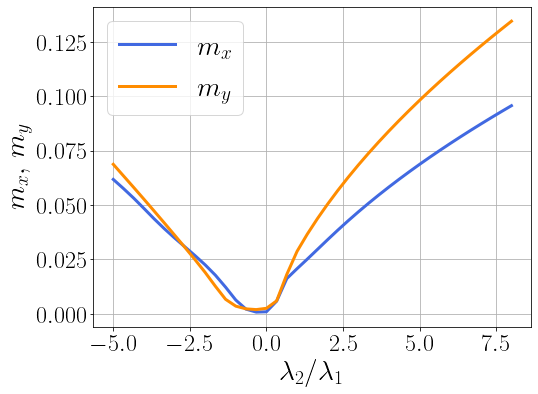

In [24]:
import matplotlib.pyplot as plt

# ----------------- Font and Plot Settings ------------------
int1 = 28
int2 = 24

plt.rcParams.update({
    "text.usetex": True,              # Use LaTeX for text rendering
    "font.size": int2,                  # Global font size
    "legend.fontsize": int1,            # Legend font size
    "axes.labelsize": int1,            # Axes labels
    "xtick.labelsize": int2,            # Tick sizes
    "ytick.labelsize": int2,
    "figure.figsize": (8, 6),         # Figure size (width, height)
    "lines.linewidth": 3             # Line thickness
})

# ----------------- Plotting ------------------
plt.figure()
plt.plot(saved_x, mx, label=r"$m_x$", color='royalblue')
plt.plot(saved_x, my, label=r"$m_y$", color='darkorange')
plt.xlabel(r"$\lambda_2/\lambda_1$")
plt.ylabel(r"$m_x,\, m_y$")
plt.legend()
plt.grid(True) #, linestyle='--', alpha=0.6)
plt.tight_layout()

# ----------------- Save High-Resolution Figure ------------------
plt.savefig("order_parameters_vs_lambda2.png"),
#             , bbox_inches='tight'
#             , transparent=True , dpi=300,

# ----------------- Show Plot ------------------
plt.show()


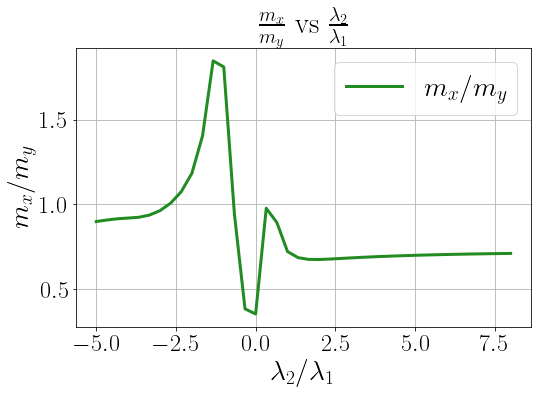

In [27]:
# --------------- Plotting mx/my vs lambda2/lambda1 ----------------
plt.figure()
plt.plot(saved_x, mx / my, label=r"$m_x/m_y$", color='forestgreen')
plt.title(r"$\frac{m_x}{m_y}$ vs $\frac{\lambda_2}{\lambda_1}$")
plt.xlabel(r"$\lambda_2/\lambda_1$")
plt.ylabel(r"$m_x/m_y$")
plt.grid(True) #, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# --------------- Save High-Resolution Figure ----------------
plt.savefig("mx_over_my_vs_lambda2.png", dpi=300, bbox_inches='tight', transparent=True)

# --------------- Show Plot ----------------
plt.show()